In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/Data/cars.csv")
df.drop(columns=["Car","Model"],inplace=True)

train = 0.7

train = df.iloc[:int(0.7*len(df)),:]
test = df.iloc[int(0.7*len(df)):,:]

train.to_csv("train.csv",index=None)
test.to_csv("test.csv",index=None)

Xtrain,Ytrain = train.iloc[:,:-1],train.iloc[:,-1:]
Xtest,Ytest = test.iloc[:,:-1],test.iloc[:,-1:]

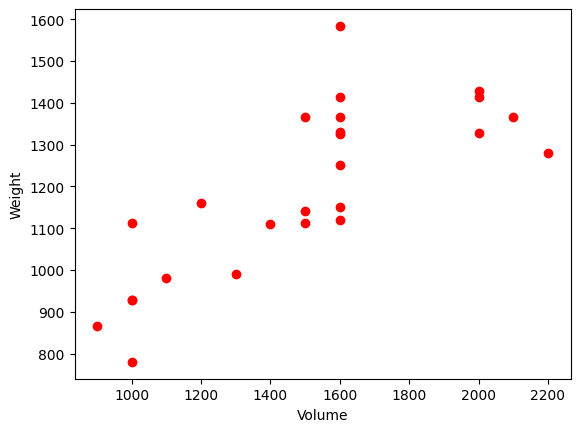

In [18]:
plt.plot(Xtrain.loc[:,'Volume'],Xtrain.loc[:,'Weight'], 'ro')
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.show()

In [44]:
Xtrain,Ytrain = train.loc[:,'Volume'],train.loc[:,'Weight']
Xtest,Ytest = test.loc[:,'Volume'],test.loc[:,'Weight']

In [45]:
x = np.array([Xtrain]).T
y = np.array([Ytrain]).T
x.shape,y.shape

((25, 1), (25, 1))

In [46]:
one = np.ones((x.shape[0], 1))
Xbar = np.concatenate((one, x), axis = 1)

In [47]:
one.shape,Xbar.shape

((25, 1), (25, 2))

In [22]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[5.59122994e+02]
 [4.22664671e-01]]


In [23]:
w_0 = w[0][0]
w_1 = w[1][0]

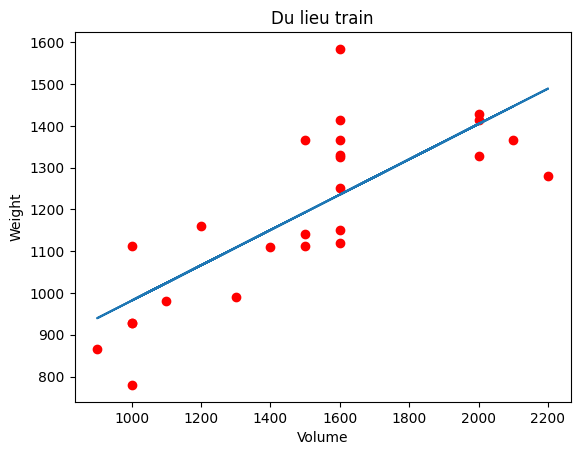

In [24]:
plt.plot(Xtrain,Ytrain, 'ro')     # data
plt.plot(Xtrain, w_0 + w_1*Xtrain)
plt.title("Du lieu train")              # the fitting line
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.show()

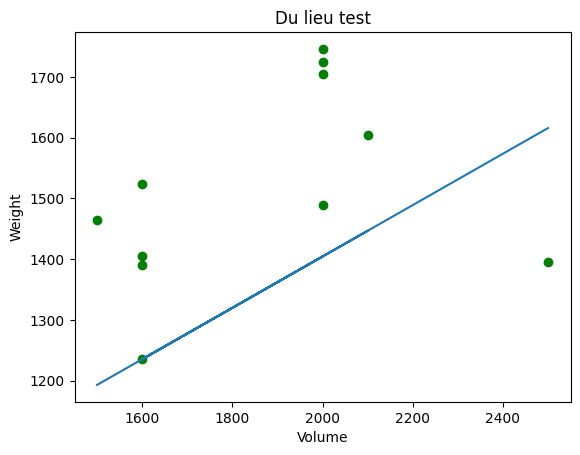

In [25]:
plt.plot(Xtest,Ytest, 'go')     # data
plt.plot(Xtest, w_0 + w_1*Xtest)
plt.title("Du lieu test")                 # the fitting line
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.show()

In [68]:
Xtrain,Ytrain = train.loc[:,['Volume','Weight']],train.loc[:,'CO2']
Xtest,Ytest = test.loc[:,['Volume','Weight']],test.loc[:,'CO2']

In [69]:
Xtrain.shape

(25, 2)

In [70]:
x = Xtrain.to_numpy()
y = np.array([Ytrain]).T
x.shape,y.shape

((25, 2), (25, 1))

In [71]:
one = np.ones((x.shape[0], 1))
one.shape
Xbar = np.concatenate((one, x), axis = 1)

In [72]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[ 1.00563778e+02]
 [ 9.20148938e-03]
 [-1.34823082e-02]]


In [73]:
a,b = w[1:],w[0]

In [74]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [75]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [76]:
a = model.coef_

In [77]:
b = model.intercept_

In [78]:
a,b

(array([ 0.00920149, -0.01348231]), 100.56377752213996)

In [83]:
y_test = model.predict(Xtest)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
mae = mean_absolute_error(y_test, Ytest)

In [86]:
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  13.282431402642517
